In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../Pipeline/Data/demand_est.csv")

In [3]:
df

,distance,cab_type,source,destination,name,car_type,weekday,rush_hour,temp,clouds,...,humidity,wind,is_raining,temp_groups,surge_multiplier,price,estimated_eta,estimated_a,estimated_b,estimated_demand
0,3.01,Uber,North Station,Boston University,Black SUV,Luxury SUV,1,0,40.51,1.00,...,0.92,1.35,0,40,1.0,35.0,0.000301,34.518257,19.991280,54.472641
1,3.01,Uber,North Station,Boston University,Black SUV,Luxury SUV,1,0,40.51,1.00,...,0.92,1.35,0,40,1.0,32.5,0.000301,34.518257,19.991280,54.473410
2,3.01,Uber,North Station,Boston University,Black SUV,Luxury SUV,1,0,40.54,1.00,...,0.92,1.42,0,40,1.0,35.0,0.000301,34.518257,19.991280,54.472641
3,3.15,Lyft,North Station,Boston University,Lux Black XL,Luxury SUV,1,1,41.10,0.97,...,0.92,1.82,0,40,1.0,34.0,0.000301,34.518257,19.991280,54.472942
4,3.09,Lyft,North Station,Boston University,Lux Black XL,Luxury SUV,1,1,41.10,0.97,...,0.92,1.82,0,40,1.0,32.5,0.000301,34.518257,19.991280,54.473410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,1.41,Uber,North End,Theatre District,Black,Luxury,1,0,30.85,0.00,...,0.46,13.14,0,30,1.0,16.0,0.707719,0.074524,18.439715,18.450189
637972,1.52,Lyft,North End,Theatre District,Lux,Luxury,1,0,30.85,0.00,...,0.46,13.14,0,30,1.0,13.5,0.707719,0.074524,18.439715,18.451527
637973,1.52,Lyft,North End,Theatre District,Lux Black,Luxury,1,0,30.85,0.00,...,0.46,13.14,0,30,1.0,19.5,0.707719,0.074524,18.439715,18.448820
637974,1.41,Uber,North End,Theatre District,Black,Luxury,1,0,30.85,0.00,...,0.46,13.14,0,30,1.0,16.0,0.707719,0.074524,18.439715,18.450189


In [6]:
df['estimated_a'].describe()

count    637976.000000
mean          5.739936
std          11.293758
min           0.003124
25%           0.027034
50%           0.062168
75%           6.117050
max          64.412319
Name: estimated_a, dtype: float64

In [12]:
df['base_price'] = df.groupby(by=['source', 'destination', 'car_type'])['price'].transform('min')


In [13]:
df['dynamic_price'] = df['base_price'] * (1 + df['estimated_eta'] * df['estimated_demand'])
df['estimated_demand'] = df['estimated_a'] * np.exp(-np.abs(df['estimated_eta']) * np.log(df['price'])) + df['estimated_b']

In [46]:
df

,distance,cab_type,source,destination,name,car_type,weekday,rush_hour,temp,clouds,...,is_raining,temp_groups,surge_multiplier,price,estimated_eta,estimated_a,estimated_b,estimated_demand,base_price,dynamic_price
0,3.01,Uber,North Station,Boston University,Black SUV,Luxury SUV,1,0,40.51,1.00,...,0,40,1.0,35.0,0.000301,34.518257,19.991280,54.472641,28.5,28.966981
1,3.01,Uber,North Station,Boston University,Black SUV,Luxury SUV,1,0,40.51,1.00,...,0,40,1.0,32.5,0.000301,34.518257,19.991280,54.473410,28.5,28.966987
2,3.01,Uber,North Station,Boston University,Black SUV,Luxury SUV,1,0,40.54,1.00,...,0,40,1.0,35.0,0.000301,34.518257,19.991280,54.472641,28.5,28.966981
3,3.15,Lyft,North Station,Boston University,Lux Black XL,Luxury SUV,1,1,41.10,0.97,...,0,40,1.0,34.0,0.000301,34.518257,19.991280,54.472942,28.5,28.966983
4,3.09,Lyft,North Station,Boston University,Lux Black XL,Luxury SUV,1,1,41.10,0.97,...,0,40,1.0,32.5,0.000301,34.518257,19.991280,54.473410,28.5,28.966987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,1.41,Uber,North End,Theatre District,Black,Luxury,1,0,30.85,0.00,...,0,30,1.0,16.0,0.707719,0.074524,18.439715,18.450189,13.5,189.776828
637972,1.52,Lyft,North End,Theatre District,Lux,Luxury,1,0,30.85,0.00,...,0,30,1.0,13.5,0.707719,0.074524,18.439715,18.451527,13.5,189.789614
637973,1.52,Lyft,North End,Theatre District,Lux Black,Luxury,1,0,30.85,0.00,...,0,30,1.0,19.5,0.707719,0.074524,18.439715,18.448820,13.5,189.763754
637974,1.41,Uber,North End,Theatre District,Black,Luxury,1,0,30.85,0.00,...,0,30,1.0,16.0,0.707719,0.074524,18.439715,18.450189,13.5,189.776828


In [59]:
tested_df

,distance,cab_type,source,destination,name,car_type,weekday,rush_hour,temp,clouds,...,is_raining,temp_groups,surge_multiplier,price,estimated_eta,estimated_a,estimated_b,estimated_demand,base_price,dynamic_price
2,3.01,Uber,North Station,Boston University,Black SUV,Luxury SUV,1,0,40.54,1.00,...,0,40,1.0,35.0,0.000301,34.518257,19.991280,54.472641,28.5,28.966981
1757,3.15,Lyft,North Station,Fenway,Lux Black XL,Luxury SUV,1,0,41.26,0.63,...,0,40,1.0,32.5,0.000418,33.009834,19.988728,52.950505,28.5,29.131553
25658,2.33,Uber,Back Bay,North End,Black SUV,Luxury SUV,0,1,38.40,1.00,...,0,30,1.0,29.5,0.000099,36.646048,19.997051,56.630803,28.0,28.157229
10049,2.80,Uber,West End,Boston University,Black SUV,Luxury SUV,0,0,38.75,0.83,...,0,30,1.0,34.0,0.000477,30.884913,19.987658,50.820621,27.5,28.167205
200000,0.56,Lyft,South Station,Financial District,Shared,Shared,0,0,36.70,0.90,...,0,30,1.0,3.0,0.415987,0.009451,4.753177,4.759162,2.5,7.449377
637974,1.41,Uber,North End,Theatre District,Black,Luxury,1,0,30.85,0.00,...,0,30,1.0,16.0,0.707719,0.074524,18.439715,18.450189,13.5,189.776828


In [58]:
tested_df['dynamic_price'] = tested_df['base_price'] * (1 + tested_df['estimated_eta'] * tested_df['estimated_demand'])
tested_df['estimated_demand'] = tested_df['estimated_a'] * np.exp(-np.abs(tested_df['estimated_eta']) * np.log(tested_df['price'])) + tested_df['estimated_b']

In [16]:
grouped_df = df.groupby(['source', 'destination', 'car_type']).agg(
    mean_price=('price', 'mean'),
    std_price=('price', 'std')
).reset_index()


In [17]:
grouped_df

,source,destination,car_type,mean_price,std_price
0,Back Bay,Boston University,Base,8.233587,1.560900
1,Back Bay,Boston University,Base XL,13.364547,2.451035
2,Back Bay,Boston University,Luxury,16.801962,3.531436
3,Back Bay,Boston University,Luxury SUV,27.013822,4.699675
4,Back Bay,Boston University,Shared,6.374568,1.973368
...,...,...,...,...,...
427,West End,South Station,Base XL,14.237022,1.768130
428,West End,South Station,Luxury,18.647181,2.552126
429,West End,South Station,Luxury SUV,28.235314,2.115300
430,West End,South Station,Shared,7.013661,1.738300


In [18]:
grouped_df['group_key'] = grouped_df['source'] + '-' + grouped_df['destination'] + '-' + grouped_df['car_type']


In [40]:
import pandas as pd
from scipy.stats import shapiro

# Assuming 'df' is your DataFrame and 'price' is the column you want to test

# Group by 'source', 'destination', 'car_type'
groups = df.groupby(['source', 'destination', 'car_type'])

# List to store results
results = []

for (source, destination, car_type), group in groups:
    if len(group) > 3:  # Shapiro-Wilk requires at least 3 data points
        stat, p_value = shapiro(group['price'])
        results.append({
            'Source': source,
            'Destination': destination,
            'CarType': car_type,
            'Shapiro_Stat': stat,
            'P_Value': p_value,
            'Normality': 'Yes' if p_value > 0.05 else 'No'  # Assuming a 0.05 significance level
        })

# Convert results to DataFrame
normality_test_results = pd.DataFrame(results)

# Display the results
print(normality_test_results)


       Source        Destination                 CarType  Shapiro_Stat  \
0    Back Bay  Boston University                    Base      0.747248   
1    Back Bay  Boston University                 Base XL      0.732128   
2    Back Bay  Boston University                  Luxury      0.770986   
3    Back Bay  Boston University              Luxury SUV      0.536019   
4    Back Bay  Boston University                  Shared      0.940454   
..        ...                ...                     ...           ...   
427  West End      South Station                 Base XL      0.660835   
428  West End      South Station                  Luxury      0.922249   
429  West End      South Station              Luxury SUV      0.743790   
430  West End      South Station                  Shared      0.918724   
431  West End      South Station  Wheel Chair Accessible      0.760348   

          P_Value Normality  
0    2.267301e-42        No  
1    3.054831e-43        No  
2    0.000000e+00    

In [42]:
normality_test_results['Normality'].describe()

count     432
unique      1
top        No
freq      432
Name: Normality, dtype: object

In [44]:
pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 23.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


<Figure size 600x400 with 0 Axes>

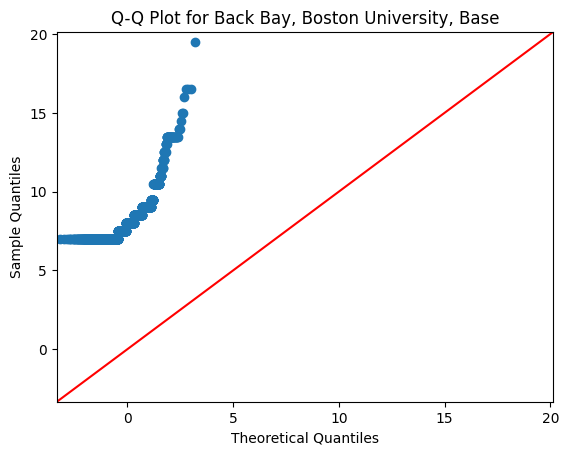

<Figure size 600x400 with 0 Axes>

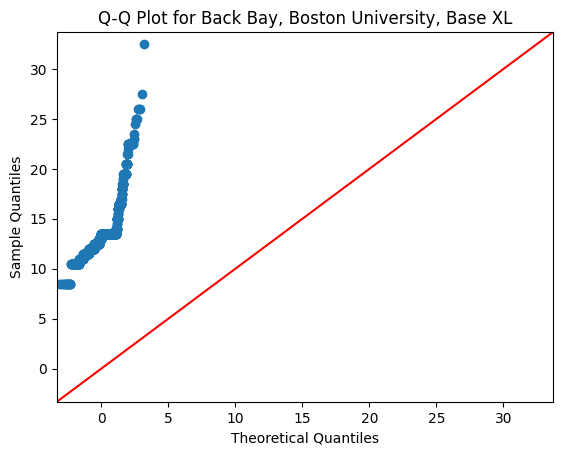

<Figure size 600x400 with 0 Axes>

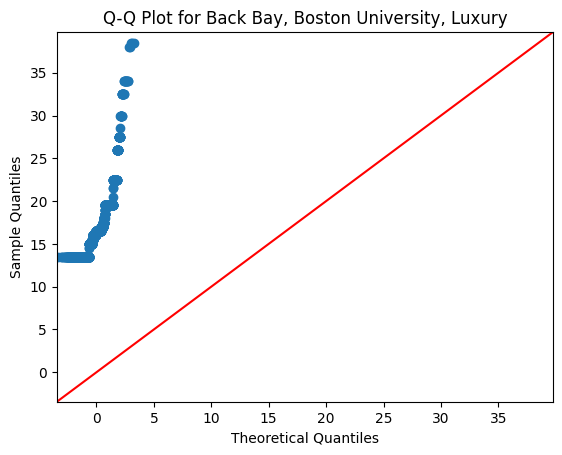

<Figure size 600x400 with 0 Axes>

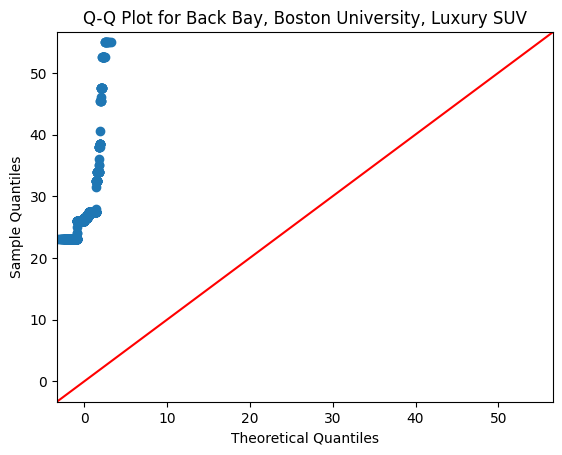

<Figure size 600x400 with 0 Axes>

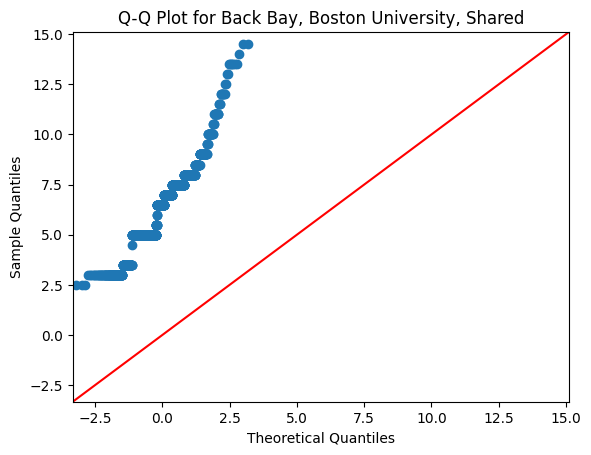

<Figure size 600x400 with 0 Axes>

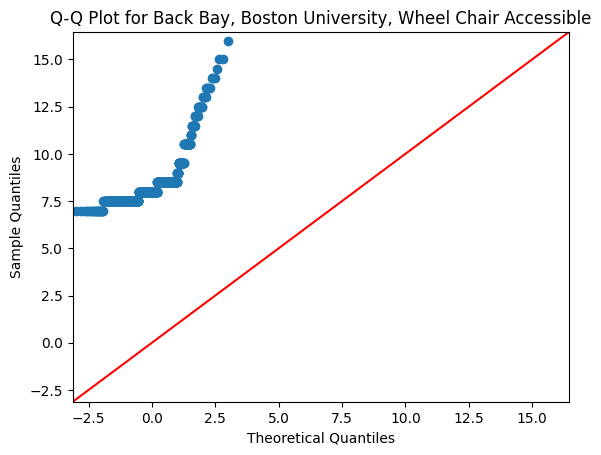

In [45]:
# Is Price a Normaly Distrubuted Visual

import statsmodels.api as sm
import matplotlib.pyplot as plt

# Group the data
groups = df.groupby(['source', 'destination', 'car_type'])

# Initialize a counter
counter = 0

# Plot Q-Q plots for the first 6 combinations
for (source, destination, car_type), group in groups:
    plt.figure(figsize=(6, 4))
    sm.qqplot(group['price'], line ='45')
    plt.title(f'Q-Q Plot for {source}, {destination}, {car_type}')
    plt.show()
    
    counter += 1
    if counter == 6:
        break


Equations

Q(Quantity Demanded)= a ⋅P^−η + b
Price = Base Price ×(1 +η × Demand Factor)

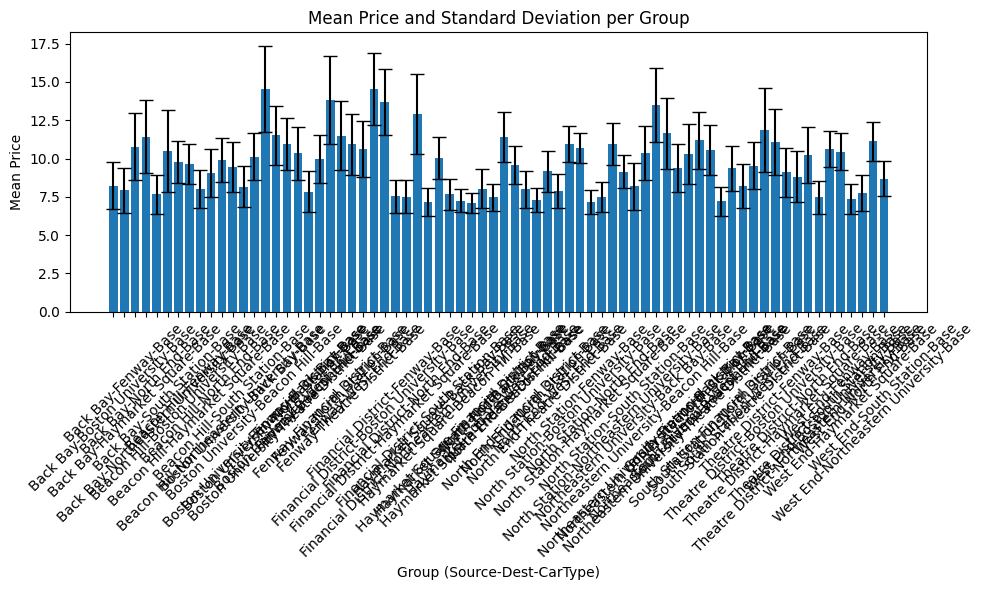

In [26]:
plt.figure(figsize=(10, 6))  # Adjust the size as per your requirement
plt.bar(base_df['group_key'], base_df['mean_price'], yerr=base_df['std_price'], capsize=5)
plt.xlabel('Group (Source-Dest-CarType)')
plt.ylabel('Mean Price')
plt.title('Mean Price and Standard Deviation per Group')
plt.xticks(rotation=45)  # Rotates the x-axis labels to avoid overlapping, adjust the angle as needed
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()


In [13]:
df['dynamic_price'] = df['base_price'] * (1 + df['estimated_eta'] * df['estimated_demand'])

Equations

Q(Quantity Demanded)= a ⋅P^−η + b

Price = Base Price ×(1 +η × Demand Factor)


Limitations: It is said that the problem we are facing is due to the low value of a. However, if we assume a large value from the beginning and run MCMC, it hardly works due to memory issues. So, we estimate a to a lower decimal point, calculate the A and demand, and then multiply it by a certain amount of constant (according to market conditions).



Solution: We ended up multiplying the current DEMAND column by a constant, which we’re told is a common practice for companies to keep A around 100. (We’re told that this number can be set arbitrarily by the company.) However, our current estimate is that A is filled with a number like 0.24242. So why not multiply A by a constant (around 600), make A around 100, and then recalculate DEMAND to apply your modeling?

In [52]:
df['estimated_a'].describe()


count    574178.000000
mean          0.320383
std           0.438718
min           0.005266
25%           0.017621
50%           0.038291
75%           0.999721
max           0.999968
Name: estimated_a, dtype: float64

create visual for intial data showing the lack of diversity in demand values, trying constant 600

In [53]:
adj_df = df.copy()
const = 600
adj_df['estimated_a'] = adj_df['estimated_a']* const

In [54]:
# Assuming base_price, elasticity, and demand are columns in a DataFrame named df
adj_df['estimated_demand'] = adj_df['estimated_a'] * np.exp(-np.abs(adj_df['estimated_eta']) * np.log(adj_df['price'])) + adj_df['estimated_b']
adj_df['dynamic_price'] = adj_df['base_price'] * (1 + adj_df['estimated_eta'] * adj_df['estimated_demand'])



In [15]:
df[(df['source'] == 'South Station') & (df['destination'] == 'Theatre District') & (df['car_type'] == 'Base')]['estimated_demand'].describe()


count    1499.000000
mean        8.221077
std         0.000995
min         8.217295
25%         8.220366
50%         8.221122
75%         8.222040
max         8.222579
Name: estimated_demand, dtype: float64

In [56]:
adj_df[(adj_df['source'] == 'South Station') & (adj_df['destination'] == 'Theatre District') & (adj_df['car_type'] == 'Base')]['estimated_demand'].describe()

count    1337.000000
mean       19.276486
std         0.377641
min        17.739701
25%        19.021680
50%        19.304650
75%        19.634417
max        19.821641
Name: estimated_demand, dtype: float64

df[(df['source'] == 'South Station') & (df['destination'] == 'Theatre District') & (df['car_type'] == 'Base')]['price'].describe()


In [60]:
df[(df['source'] == 'South Station') & (df['destination'] == 'Theatre District') & (df['car_type'] == 'Base')]['dynamic_price'].describe()


count    1337.000000
mean       18.214960
std         0.000897
min        18.211311
25%        18.214355
50%        18.215027
75%        18.215810
max        18.216255
Name: dynamic_price, dtype: float64

In [61]:
adj_df[(adj_df['source'] == 'South Station') & (adj_df['destination'] == 'Theatre District') & (adj_df['car_type'] == 'Base')]['dynamic_price'].describe()

count    1337.000000
mean       33.967038
std         0.538101
min        31.777275
25%        33.603965
50%        34.007168
75%        34.477053
max        34.743829
Name: dynamic_price, dtype: float64